## World Development Indicators - Analytics

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

datos = pd.read_csv("suramerica.csv").drop('Unnamed: 0', 1)
datos.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Antigua and Barbuda,ATG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,126.144000
1,Antigua and Barbuda,ATG,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,88.237117
2,Antigua and Barbuda,ATG,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,7.779958
3,Antigua and Barbuda,ATG,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,80.457159
4,Antigua and Barbuda,ATG,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,32.920000


In [20]:
paises = ['Antigua and Barbuda','Argentina','Aruba','Bahamas, The','Barbados','Belize','Bolivia','Brazil','Cayman Islands','Chile','Colombia','Costa Rica','Cuba','Curacao','Dominica','Dominican Republic','Ecuador','El Salvador','Grenada','Guatemala','Guyana','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Paraguay','Peru','Puerto Rico','Sint Maarten (Dutch part)','St. Kitts and Nevis','St. Lucia','St. Martin (French part)','St. Vincent and the Grenadines','Suriname','Trinidad and Tobago','Turks and Caicos Islands','Uruguay','Venezuela, RB','Virgin Islands (U.S.)']

year_init = 2012
year_range = 5
look_back = 3
years = range(year_init-year_range+1,year_init+1)[::-1]

agricultura = ['EG.ELC.ACCS.RU.ZS','EG.NSF.ACCS.RU.ZS','AG.LND.IRIG.AG.ZS','AG.LND.AGRI.ZS','AG.LND.AGRI.K2','AG.AGR.TRAC.NO','AG.LND.TRAC.ZS','EN.ATM.METH.AG.ZS','EN.ATM.METH.AG.KT.CE','EN.ATM.NOXE.AG.ZS','EN.ATM.NOXE.AG.KT.CE','TX.VAL.AGRI.ZS.UN','TM.VAL.AGRI.ZS.UN','EA.PRD.AGRI.KD','NV.AGR.TOTL.ZS','NV.AGR.TOTL.CD','ER.H2O.FWAG.ZS','AG.LND.ARBL.ZS','AG.LND.ARBL.HA.PC','AG.LND.ARBL.HA','AG.LND.PRCP.MM','AG.PRD.CREL.MT','AG.YLD.CREL.KG','AG.PRD.CROP.XD','SL.AGR.EMPL.ZS','SL.AGR.EMPL.FE.ZS','SL.AGR.EMPL.MA.ZS','AG.CON.FERT.PT.ZS','AG.CON.FERT.ZS','AG.PRD.FOOD.XD','AG.LND.FRST.ZS','AG.LND.FRST.K2','SH.STA.ACSN.RU','SH.H2O.SAFE.RU.ZS','AG.LND.TOTL.K2','AG.LND.CREL.HA','AG.PRD.LVSK.XD','AG.LND.CROP.ZS','AG.LND.TOTL.RU.K2','AG.LND.EL5M.RU.ZS','AG.LND.EL5M.RU.K2','SP.RUR.TOTL','SP.RUR.TOTL.ZS','SP.RUR.TOTL.ZG','EN.POP.EL5M.RU.ZS','SI.POV.RUGP','SI.POV.RUHC','AG.SRF.TOTL.K2']
economia = ['PA.NUS.PPP.05','PA.NUS.PRVT.PP.05','NY.ADJ.NNTY.KD.ZG','NY.ADJ.NNTY.KD','NY.ADJ.NNTY.CD','NY.ADJ.NNTY.PC.KD.ZG','NY.ADJ.NNTY.PC.KD','NY.ADJ.NNTY.PC.CD','NY.ADJ.SVNX.GN.ZS','NY.ADJ.SVNX.CD','NY.ADJ.SVNG.GN.ZS','NY.ADJ.SVNG.CD','NY.ADJ.DCO2.GN.ZS','NY.ADJ.DCO2.CD','NY.ADJ.DKAP.GN.ZS','NY.ADJ.DKAP.CD','NY.ADJ.AEDU.GN.ZS','NY.ADJ.AEDU.CD','NY.ADJ.DNGY.GN.ZS','NY.ADJ.DNGY.CD','NY.ADJ.ICTR.GN.ZS','NY.ADJ.DMIN.GN.ZS','NY.ADJ.DMIN.CD','NY.ADJ.DRES.GN.ZS','NY.ADJ.DFOR.GN.ZS','NY.ADJ.DFOR.CD','NY.ADJ.NNAT.GN.ZS','NY.ADJ.NNAT.CD','NY.ADJ.DPEM.GN.ZS','NY.ADJ.DPEM.CD','NV.AGR.TOTL.ZS','NV.AGR.TOTL.KD.ZG','NV.AGR.TOTL.KD','NV.AGR.TOTL.KN','NV.AGR.TOTL.CN','NV.AGR.TOTL.CD','GC.DOD.TOTL.GD.ZS','NE.GDI.STKB.KN','NE.GDI.STKB.CN','NE.GDI.STKB.CD','BM.GSR.ROYL.CD','BX.GSR.ROYL.CD','NV.MNF.CHEM.ZS.UN','BX.GSR.CMCP.ZS','BM.GSR.CMCP.ZS','BN.CAB.XOKA.GD.ZS','BN.CAB.XOKA.CD','PA.NUS.ATLS','NY.GDP.DISC.KN','NY.GDP.DISC.CN','GC.XPN.TOTL.GD.ZS','NY.EXP.CAPM.KN','NE.EXP.GNFS.ZS','BX.GSR.GNFS.CD','NE.EXP.GNFS.KD.ZG','NE.EXP.GNFS.KD','NE.EXP.GNFS.KN','NE.EXP.GNFS.CN','NE.EXP.GNFS.CD','BX.GSR.TOTL.CD','NE.RSB.GNFS.ZS','NE.RSB.GNFS.KN','NE.RSB.GNFS.CN','NE.RSB.GNFS.CD','DT.DOD.DECT.GN.ZS','DT.DOD.DECT.EX.ZS','DT.DOD.DECT.CD','NE.CON.TOTL.KD','NE.CON.TOTL.KN','NE.CON.TOTL.CN','NE.CON.TOTL.CD','NE.CON.TETC.ZS','NE.CON.TETC.KD.ZG','NE.CON.TETC.KD','NE.CON.TETC.KN','NE.CON.TETC.CN','NE.CON.TETC.CD','NV.MNF.FBTO.ZS.UN','BN.KLT.DINV.CD','BX.KLT.DINV.WD.GD.ZS','BX.KLT.DINV.CD.WD','BM.KLT.DINV.WD.GD.ZS','BM.KLT.DINV.CD.WD','NY.GDP.MKTP.KN','NY.GDP.MKTP.CN','NY.GDP.MKTP.CD','NY.GDP.MKTP.KD','NY.GDP.DEFL.ZS','NY.GDP.MKTP.KD.ZG','NY.GDP.PCAP.KD','NY.GDP.PCAP.KN','NY.GDP.PCAP.CN','NY.GDP.PCAP.CD','NY.GDP.PCAP.KD.ZG','NY.GDP.PCAP.PP.KD','NY.GDP.PCAP.PP.CD','NY.GDP.MKTP.PP.KD','NY.GDP.MKTP.PP.CD','NY.GNP.MKTP.KD','NY.GNP.MKTP.KN','NY.GNP.MKTP.CN','NY.GNP.MKTP.CD','NY.GNP.MKTP.KD.ZG','NY.GNP.PCAP.KD','NY.GNP.PCAP.KN','NY.GNP.PCAP.CN','NY.GNP.PCAP.KD.ZG','NY.GNP.PCAP.CD','NY.GNP.PCAP.PP.KD','NY.GNP.PCAP.PP.CD','NY.GNP.ATLS.CD','NY.GNP.MKTP.PP.KD','NY.GNP.MKTP.PP.CD','NE.CON.GOVT.ZS','NE.CON.GOVT.KD.ZG','NE.CON.GOVT.KD','NE.CON.GOVT.KN','NE.CON.GOVT.CN','NE.CON.GOVT.CD','BX.GSR.MRCH.CD','BM.GSR.MRCH.CD','BX.GRT.EXTA.CD.WD','NE.GDI.TOTL.ZS','NE.GDI.TOTL.KD.ZG','NE.GDI.TOTL.KD','NE.GDI.TOTL.KN','NE.GDI.TOTL.CN','NE.GDI.TOTL.CD','NY.GDY.TOTL.KN','NY.GDS.TOTL.ZS','NY.GDS.TOTL.CN','NY.GDS.TOTL.CD','NE.GDI.FTOT.ZS','NE.GDI.FTOT.KD.ZG','NE.GDI.FTOT.KD','NE.GDI.FTOT.KN','NE.GDI.FTOT.CN','NE.GDI.FTOT.CD','NE.GDI.FPRV.ZS','NE.GDI.FPRV.CN','NE.DAB.TOTL.ZS','NE.DAB.TOTL.KD','NE.DAB.TOTL.KN','NE.DAB.TOTL.CN','NE.DAB.TOTL.CD','NE.DAB.DEFL.ZS','NY.GNS.ICTR.ZS','NY.GNS.ICTR.GN.ZS','NY.GNS.ICTR.CN','NY.GNS.ICTR.CD','NY.GDP.FCST.KD','NY.GDP.FCST.KN','NY.GDP.FCST.CN','NY.GDP.FCST.CD','NE.CON.PRVT.KD.ZG','NE.CON.PRVT.KD','NE.CON.PRVT.KN','NE.CON.PRVT.CN','NE.CON.PRVT.CD','NE.CON.PRVT.PC.KD','NE.CON.PRVT.PC.KD.ZG','NE.CON.PRVT.PP.KD','NE.CON.PRVT.PP.CD','NE.CON.PETC.ZS','NE.CON.PETC.KD.ZG','NE.CON.PETC.KD','NE.CON.PETC.KN','NE.CON.PETC.CN','NE.CON.PETC.CD','BX.GSR.CCIS.ZS','BX.GSR.CCIS.CD','NE.IMP.GNFS.ZS','BM.GSR.GNFS.CD','NE.IMP.GNFS.KD.ZG','NE.IMP.GNFS.KD','NE.IMP.GNFS.KN','NE.IMP.GNFS.CN','NE.IMP.GNFS.CD','BM.GSR.TOTL.CD','NV.IND.TOTL.ZS','NV.IND.TOTL.KD.ZG','NV.IND.TOTL.KD','NV.IND.TOTL.KN','NV.IND.TOTL.CN','NV.IND.TOTL.CD','NY.GDP.DEFL.KD.ZG','FP.CPI.TOTL.ZG','BX.GSR.INSF.ZS','BM.GSR.INSF.ZS','DT.INT.DECT.GN.ZS','DT.INT.DECT.EX.ZS','NV.MNF.MTRN.ZS.UN','NV.IND.MANF.ZS','NV.IND.MANF.KD.ZG','NV.IND.MANF.KD','NV.IND.MANF.KN','NV.IND.MANF.CN','NV.IND.MANF.CD','DT.ODA.ODAT.GN.ZS','DT.ODA.ODAT.PC.ZS','BN.TRF.KOGT.CD','NY.TRF.NCTR.KN','NY.TRF.NCTR.CN','NY.TRF.NCTR.CD','BN.KAC.EOMS.CD','BN.FIN.TOTL.CD','NY.GSR.NFCY.KN','NY.GSR.NFCY.CN','NY.GSR.NFCY.CD','DT.ODA.ODAT.CD','BN.GSR.FCTY.CD','BN.TRF.CURR.CD','NY.TAX.NIND.KN','NY.TAX.NIND.CN','NY.TAX.NIND.CD','BN.GSR.MRCH.CD','BN.GSR.GNFS.CD','NV.MNF.OTHR.ZS.UN','PA.NUS.PPP','PA.NUS.PRVT.PP','BM.TRF.PWKR.CD.DT','BX.TRF.PWKR.DT.GD.ZS','BX.TRF.PWKR.CD.DT','BX.TRF.PWKR.CD','BN.KLT.PTXL.CD','BX.PEF.TOTL.CD.WD','DT.DOD.PVLX.GN.ZS','DT.DOD.PVLX.EX.ZS','DT.DOD.PVLX.CD','PA.NUS.PPPC.RF','BX.KLT.DREM.CD.DT','BM.GSR.FCTY.CD','BX.GSR.FCTY.CD','BN.RES.INCL.CD','GC.REV.XGRT.GD.ZS','BX.TRF.CURR.CD','BM.TRF.PRVT.CD','BX.GSR.NFSV.CD','BM.GSR.NFSV.CD','NV.SRV.TETC.ZS','NV.SRV.TETC.KD.ZG','NV.SRV.TETC.KD','NV.SRV.TETC.KN','NV.SRV.TETC.CN','NV.SRV.TETC.CD','DT.DOD.DSTC.XP.ZS','DT.DOD.DSTC.IR.ZS','BX.GRT.TECH.CD.WD','NY.TTF.GNFS.KN','NV.MNF.TXTL.ZS.UN','DT.TDS.DECT.GN.ZS','DT.TDS.DECT.EX.ZS','FI.RES.TOTL.CD','FI.RES.XGLD.CD','NE.TRD.GNFS.ZS','BG.GSR.NFSV.GD.ZS','BX.GSR.TRAN.ZS','BM.GSR.TRAN.ZS','BX.GSR.TRVL.ZS','BM.GSR.TRVL.ZS']
educacion = ['SE.PRM.TENR.FE','SE.PRM.TENR.MA','SE.PRM.TENR','SE.SEC.UNER.LO.ZS','SE.SEC.UNER.LO.FE.ZS','SE.SEC.UNER.LO.MA.ZS','SE.ADT.LITR.ZS','SE.XPD.MPRM.ZS','SE.XPD.MSEC.ZS','SE.XPD.MTER.ZS','SE.XPD.MTOT.ZS','SE.PRM.UNER.ZS','SE.PRM.UNER.FE.ZS','SE.PRM.UNER.MA.ZS','SE.PRM.UNER.FE','SE.PRM.UNER.MA','SE.XPD.CPRM.ZS','SE.XPD.CSEC.ZS','SE.XPD.CTER.ZS','SE.XPD.CTOT.ZS','SE.COM.DURS','SE.TER.CUAT.DO.FE.ZS','SE.TER.CUAT.DO.MA.ZS','SE.TER.CUAT.DO.ZS','SE.TER.CUAT.BA.FE.ZS','SE.TER.CUAT.BA.MA.ZS','SE.TER.CUAT.BA.ZS','SE.TER.CUAT.MS.FE.ZS','SE.TER.CUAT.MS.MA.ZS','SE.TER.CUAT.MS.ZS','SE.SEC.CUAT.LO.FE.ZS','SE.SEC.CUAT.LO.MA.ZS','SE.SEC.CUAT.LO.ZS','SE.SEC.CUAT.PO.FE.ZS','SE.SEC.CUAT.PO.MA.ZS','SE.SEC.CUAT.PO.ZS','SE.PRM.CUAT.FE.ZS','SE.PRM.CUAT.MA.ZS','SE.PRM.CUAT.ZS','SE.TER.CUAT.ST.FE.ZS','SE.TER.CUAT.ST.MA.ZS','SE.TER.CUAT.ST.ZS','SE.SEC.CUAT.UP.FE.ZS','SE.SEC.CUAT.UP.MA.ZS','SE.SEC.CUAT.UP.ZS','SE.SEC.PROG.ZS','SM.EMI.TERT.ZS','SE.PRM.ENRL','SE.SEC.ENRL','SE.SEC.ENRL.GC','SE.SEC.ENRL.VO','SE.XPD.TOTL.GB.ZS','SE.XPD.PRIM.ZS','SE.XPD.SECO.ZS','SE.XPD.TERT.ZS','SE.XPD.TOTL.GD.ZS','SE.XPD.PRIM.PC.ZS','SE.XPD.SECO.PC.ZS','SE.XPD.TERT.PC.ZS','SE.PRM.ENRR','SE.PRE.ENRR','SE.PRE.ENRR.FE','SE.PRE.ENRR.MA','SE.SEC.ENRR','SE.TER.ENRR','SE.PRM.GINT.ZS','SE.PRM.GINT.FE.ZS','SE.PRM.GINT.MA.ZS','SL.TLF.PRIM.ZS','SL.TLF.PRIM.FE.ZS','SL.TLF.PRIM.MA.ZS','SL.TLF.SECO.ZS','SL.TLF.SECO.FE.ZS','SL.TLF.SECO.MA.ZS','SL.TLF.TERT.ZS','SL.TLF.TERT.FE.ZS','SL.TLF.TERT.MA.ZS','SL.TLF.TOTL.FE.ZS','SL.TLF.TOTL.IN','SE.ADT.LITR.FE.ZS','SE.ADT.LITR.MA.ZS','SE.ADT.1524.LT.FM.ZS','SE.ADT.1524.LT.FE.ZS','SE.ADT.1524.LT.MA.ZS','SE.SEC.CMPT.LO.FE.ZS','SE.SEC.CMPT.LO.MA.ZS','SE.SEC.CMPT.LO.ZS','SE.PRM.NENR','SE.SEC.NENR','SE.PRM.NINT.FE.ZS','SE.PRM.NINT.MA.ZS','SE.PRM.NINT.ZS','SE.SEC.AGES','SE.PRM.AGES','SE.PRM.UNER','SE.PRM.OENR.ZS','SE.PRM.OENR.FE.ZS','SE.PRM.OENR.MA.ZS','SE.PRM.PRIV.ZS','SE.SEC.PRIV.ZS','SE.PRM.TCAQ.FE.ZS','SE.SEC.TCAQ.FE.ZS','SE.PRM.TCAQ.MA.ZS','SE.SEC.TCAQ.MA.ZS','SE.PRM.REPT.ZS','SE.PRM.REPT.FE.ZS','SE.PRM.REPT.MA.ZS','SE.SEC.ENRL.GC.FE.ZS','SE.SEC.ENRL.VO.FE.ZS','SE.PRM.TCAQ.ZS','SE.SEC.TCAQ.ZS','SE.PRM.PRS5.FE.ZS','SE.PRM.PRS5.MA.ZS','SP.POP.0014.TO.ZS','SP.POP.1564.TO.ZS','SE.PRE.DURS','SE.PRM.CMPT.FE.ZS','SE.PRM.CMPT.MA.ZS','SE.PRM.CMPT.ZS','SE.PRM.ENRL.FE.ZS','SE.PRM.TCHR.FE.ZS','SE.SEC.PROG.FE.ZS','SE.SEC.PROG.MA.ZS','SE.PRE.ENRL.TC.ZS','SE.PRM.ENRL.TC.ZS','SE.SEC.ENRL.TC.ZS','SE.SEC.ENRL.LO.TC.ZS','SE.TER.ENRL.TC.ZS','SE.SEC.ENRL.UP.TC.ZS','SE.ENR.PRIM.FM.ZS','SE.ENR.PRSC.FM.ZS','SE.PRM.ENRR.FE','SE.PRM.NENR.FE','SE.PRM.ENRR.MA','SE.PRM.NENR.MA','SE.ENR.SECO.FM.ZS','SE.SEC.ENRR.FE','SE.SEC.NENR.FE','SE.SEC.ENRR.MA','SE.SEC.NENR.MA','SE.ENR.TERT.FM.ZS','SE.TER.ENRR.FE','SE.TER.ENRR.MA','SE.SEC.ENRL.FE.ZS','SE.SEC.TCHR.FE.ZS','SE.PRM.PRS5.ZS','SE.PRM.PRSL.ZS','SE.PRM.PRSL.FE.ZS','SE.PRM.PRSL.MA.ZS','SE.PRM.TCHR','SE.SEC.TCHR','SE.SEC.TCHR.FE','SE.TER.TCHR.FE.ZS','SE.PRM.DURS','SE.SEC.DURS','SE.SEC.TCAQ.LO.ZS','SE.SEC.TCAQ.LO.FE.ZS','SE.SEC.TCAQ.LO.MA.ZS','SE.PRE.TCAQ.ZS','SE.PRE.TCAQ.FE.ZS','SE.PRE.TCAQ.MA.ZS','SE.SEC.TCAQ.UP.ZS','SE.SEC.TCAQ.UP.FE.ZS','SE.SEC.TCAQ.UP.MA.ZS','SL.UEM.TOTL.FE.ZS','SL.UEM.TOTL.MA.ZS','SL.UEM.TOTL.ZS','SE.ADT.1524.LT.ZS']
salud = ['SH.STA.ARIC.ZS','SP.ADO.TFRT','SH.HIV.INCD.TL','SH.HIV.INCD','SP.POP.DPND','SP.POP.DPND.OL','SP.POP.DPND.YG','SH.HIV.ARTC.ZS','SH.HIV.PMTC.ZS','SP.DYN.CBRT.IN','SH.STA.BRTC.ZS','SH.DTH.COMM.ZS','SH.DTH.INJR.ZS','SH.DTH.NCOM.ZS','SH.HIV.0014','SH.HIV.INCD.14','SH.MLR.TRET.ZS','SH.MED.CMHW.P3','SP.REG.BRTH.ZS','SP.REG.BRTH.RU.ZS','SP.REG.BRTH.UR.ZS','SP.REG.DTHS.ZS','SP.DTH.INFR.ZS','SP.DTH.REPT.ZS','SH.CON.1524.FE.ZS','SH.CON.1524.MA.ZS','SN.ITK.SALT.ZS','SP.DYN.CONU.ZS','SP.DYN.CONM.ZS','SP.DYN.CDRT.IN','SH.FPL.SATM.ZS','SN.ITK.DFCT','SH.STA.DIAB.ZS','SH.STA.ORCF.ZS','SH.STA.ORTH','SM.EMI.TERT.ZS','SH.STA.BFED.ZS','SH.XPD.EXTR.ZS','SH.STA.FGMS.ZS','SP.HOU.FEMA.ZS','SP.DYN.TFRT.IN','SH.XPD.PCAP','SH.XPD.PCAP.PP.KD','SH.XPD.PRIV.ZS','SH.XPD.PUBL.ZS','SH.XPD.PUBL.GX.ZS','SH.XPD.PUBL','SH.XPD.TOTL.ZS','SH.MED.BEDS.ZS','SH.IMM.IDPT','SH.IMM.MEAS','SH.STA.ACSN','SH.STA.ACSN.RU','SH.STA.ACSN.UR','SH.H2O.SAFE.ZS','SH.H2O.SAFE.RU.ZS','SH.H2O.SAFE.UR.ZS','SH.HIV.INCD.ZS','SH.MLR.INCD.P3','SH.TBS.INCD','SM.POP.TOTL.ZS','SM.POP.TOTL','SP.DYN.LE00.FE.IN','SP.DYN.LE00.MA.IN','SP.DYN.LE00.IN','SH.MMR.RISK.ZS','SH.MMR.RISK','SH.STA.BRTW.ZS','SH.STA.MMRT','SH.STA.MMRT.NE','SH.STA.TRAF.P5','SH.DYN.NCOM.ZS','SP.DYN.AMRT.FE','SP.DYN.AMRT.MA','SP.DYN.IMRT.IN','SP.DYN.IMRT.FE.IN','SP.DYN.IMRT.MA.IN','SH.DYN.NMRT','SH.DYN.MORT','SH.DYN.MORT.FE','SH.DYN.MORT.MA','SM.POP.NETM','SH.VAC.TTNS.ZS','SH.DTH.IMRT','SH.MMR.DTHS','SH.DTH.NMRT','SH.SGR.PROC.P5','SH.DTH.MORT','SH.MED.NUMW.P3','SH.XPD.OOPC.ZS','SH.XPD.OOPC.TO.ZS','SH.STA.ODFC.ZS','SH.STA.ODFC.RU.ZS','SH.STA.ODFC.UR.ZS','SH.MED.PHYS.ZS','SP.POP.0014.TO.ZS','SP.POP.1564.TO.ZS','SP.POP.65UP.TO.ZS','SP.POP.GROW','SP.POP.TOTL.FE.ZS','SP.POP.TOTL','SH.STA.ANVC.ZS','SH.HIV.1524.FE.ZS','SH.HIV.1524.MA.ZS','SH.DYN.AIDS.ZS','SH.ANM.CHLD.ZS','SH.ANM.NPRG.ZS','SH.PRG.ANEM','SH.ANM.ALLW.ZS','SH.STA.OWGH.ZS','SH.STA.OWGH.FE.ZS','SH.STA.OWGH.MA.ZS','SH.SVR.WAST.ZS','SH.SVR.WAST.FE.ZS','SH.SVR.WAST.MA.ZS','SH.STA.STNT.ZS','SH.STA.STNT.FE.ZS','SH.STA.STNT.MA.ZS','SN.ITK.DEFC.ZS','SH.STA.MALN.ZS','SH.STA.MALN.FE.ZS','SH.STA.MALN.MA.ZS','SH.STA.WAST.ZS','SH.STA.WAST.FE.ZS','SH.STA.WAST.MA.ZS','SG.VAW.1549.ZS','SM.POP.REFG','SM.POP.REFG.OR','SH.SGR.CRSK.ZS','SH.SGR.IRSK.ZS','SH.PRV.SMOK.FE','SH.PRV.SMOK.MA','SH.MED.SAOP.P5','SH.STA.SUIC.P5','SP.DYN.TO65.FE.ZS','SP.DYN.TO65.MA.ZS','SP.MTR.1519.ZS','SH.ALC.PCAP.LI','SH.TBS.DTEC.ZS','SH.TBS.CURE.ZS','SP.UWT.TFRT','SH.MLR.NETS.ZS','SN.ITK.VITA.ZS','SP.DYN.WFRT','SG.VAW.REAS.ZS','SG.VAW.ARGU.ZS','SG.VAW.BURN.ZS','SG.VAW.GOES.ZS','SG.VAW.NEGL.ZS','SG.VAW.REFU.ZS','SP.M18.2024.FE.ZS','SH.DYN.AIDS.FE.ZS']
deuda = ['DT.GPA.DPPG','DT.GPA.OFFT','DT.GPA.PRVT','DT.GRE.DPPG','DT.GRE.OFFT','DT.GRE.PRVT','DT.INR.DPPG','DT.INR.OFFT','DT.INR.PRVT','DT.MAT.DPPG','DT.MAT.OFFT','DT.MAT.PRVT','DT.NFL.PCBO.CD','DT.COM.MIBR.CD','DT.COM.MIDA.CD','DT.COM.OFFT.CD','DT.COM.PRVT.CD','DT.COM.DPPG.CD','DT.DOD.ALLC.ZS','DT.CUR.DMAK.ZS','DT.CUR.EURO.ZS','DT.CUR.FFRC.ZS','DT.CUR.JYEN.ZS','DT.CUR.MULC.ZS','DT.CUR.UKPS.ZS','DT.CUR.SDRW.ZS','DT.CUR.SWFR.ZS','DT.CUR.USDL.ZS','DT.CUR.OTHC.ZS','BN.CAB.XOKA.CD','DT.DSB.DPPG.CD','DT.DOD.MDRI.CD','DT.DFR.DPPG.CD','DT.TDS.DPPF.XP.ZS','DT.TDS.DLXF.CD','DT.TDS.DPNG.CD','DT.TDS.DPPG.CD','DT.TDS.DECT.CD','DT.DSF.DPPG.CD','DT.DXR.DPPG.CD','DT.DIS.DLXF.CD','DT.DIS.DLTF.CD','DT.DIS.DPNG.CD','DT.DIS.DPPG.CD','DT.NFL.NEBR.CD','BX.GSR.TOTL.CD','DT.DOD.DECT.GN.ZS','DT.DOD.DECT.EX.ZS','DT.DOD.ALLC.CD','DT.DOD.DLXF.CD','DT.DOD.PRVS.CD','DT.DOD.PUBS.CD','DT.DOD.DPNG.CD','DT.DOD.DPPG.CD','DT.DOD.DSTC.CD','DT.DOD.DECT.CD','DT.DOD.VTOT.CD','BX.KLT.DINV.CD.WD','NY.GNP.MKTP.CD','BX.GRT.EXTA.CD.WD','DT.DOD.MWBG.CD','DT.DIS.IDAG.CD','DT.NFL.NIFC.CD','DT.INT.DIMF.CD','DT.DIS.DIMF.CD','DT.AMT.DIMF.CD','DT.TDS.DIMF.CD','BM.GSR.TOTL.CD','DT.IXA.DPPG.CD','DT.IXA.OFFT.CD','DT.IXA.PRVT.CD','DT.IXF.DPPG.CD','DT.INT.DECT.GN.ZS','DT.INT.DECT.EX.ZS','DT.INT.DLXF.CD','DT.INT.DPNG.CD','DT.INT.DPPG.CD','DT.INT.DSTC.CD','DT.INT.DECT.CD','DT.IXR.DPPG.CD','DT.IXR.OFFT.CD','DT.IXR.PRVT.CD','DT.DOD.MLAT.ZS','DT.TDS.MLAT.PG.ZS','DT.TDS.MLAT.CD','DT.ODA.ODAT.GN.ZS','DT.ODA.ODAT.PC.ZS','DT.IXA.DPPG.CD.CG','DT.NFL.MIBR.CD','DT.NFL.MIDA.CD','DT.NFL.IMFC.CD','DT.NFL.IMFN.CD','DT.NFL.RDBC.CD','DT.NFL.RDBN.CD','DT.NFL.BLAT.CD','DT.NFL.MLAT.CD','DT.NFL.MOTH.CD','DT.NFL.DLXF.CD','DT.NFL.DPNG.CD','DT.NFL.DPPG.CD','DT.NFL.DSTC.CD','DT.NFL.DECT.CD','DT.ODA.ODAT.CD','DT.NTR.DLXF.CD','DT.NTR.DPNG.CD','DT.NTR.DPPG.CD','DT.NTR.DECT.CD','DT.AMT.PNGB.CD','DT.DIS.PNGB.CD','DT.DOD.PNGB.CD','DT.INT.PNGB.CD','DT.NFL.PNGB.CD','DT.NTR.PNGB.CD','DT.TDS.PNGB.CD','DT.AMT.PNGC.CD','DT.DIS.PNGC.CD','DT.DOD.PNGC.CD','DT.INT.PNGC.CD','DT.NFL.PNGC.CD','DT.NTR.PNGC.CD','DT.TDS.PNGC.CD','DT.AMT.MIBR.CD','DT.DIS.MIBR.CD','DT.DOD.MIBR.CD','DT.INT.MIBR.CD','DT.NTR.MIBR.CD','DT.TDS.MIBR.CD','DT.AMT.MIDA.CD','DT.DIS.MIDA.CD','DT.DOD.MIDA.CD','DT.INT.MIDA.CD','DT.NTR.MIDA.CD','DT.TDS.MIDA.CD','DT.AMT.BLAT.CD','DT.DIS.BLAT.CD','DT.DOD.BLAT.CD','DT.INT.BLAT.CD','DT.NTR.BLAT.CD','DT.TDS.BLAT.CD','DT.AMT.BLTC.CD','DT.DIS.BLTC.CD','DT.DOD.BLTC.CD','DT.INT.BLTC.CD','DT.NFL.BLTC.CD','DT.NTR.BLTC.CD','DT.TDS.BLTC.CD','DT.AMT.PBND.CD','DT.DIS.PBND.CD','DT.DOD.PBND.CD','DT.INT.PBND.CD','DT.NFL.PBND.CD','DT.NTR.PBND.CD','DT.TDS.PBND.CD','DT.AMT.PCBK.CD','DT.DIS.PCBK.CD','DT.DOD.PCBK.CD','DT.INT.PCBK.CD','DT.NFL.PCBK.CD','DT.NTR.PCBK.CD','DT.TDS.PCBK.CD','DT.AMT.MLAT.CD','DT.DIS.MLAT.CD','DT.DOD.MLAT.CD','DT.INT.MLAT.CD','DT.NTR.MLAT.CD','DT.AMT.MLTC.CD','DT.DIS.MLTC.CD','DT.DOD.MLTC.CD','DT.INT.MLTC.CD','DT.NFL.MLTC.CD','DT.NTR.MLTC.CD','DT.TDS.MLTC.CD','DT.AMT.OFFT.CD','DT.DIS.OFFT.CD','DT.DOD.OFFT.CD','DT.INT.OFFT.CD','DT.NFL.OFFT.CD','DT.NTR.OFFT.CD','DT.TDS.OFFT.CD','DT.AMT.PROP.CD','DT.DIS.PROP.CD','DT.DOD.PROP.CD','DT.INT.PROP.CD','DT.NFL.PROP.CD','DT.NTR.PROP.CD','DT.TDS.PROP.CD','DT.AMT.PRVT.CD','DT.DIS.PRVT.CD','DT.DOD.PRVT.CD','DT.INT.PRVT.CD','DT.NFL.PRVT.CD','DT.NTR.PRVT.CD','DT.TDS.PRVT.CD','BX.TRF.PWKR.CD.DT','BX.PEF.TOTL.CD.WD','DT.NFL.BOND.CD','DT.DOD.PVLX.GN.ZS','DT.DOD.PVLX.EX.ZS','DT.DOD.PVLX.CD','BX.KLT.DREM.CD.DT','DT.AXA.DPPG.CD','DT.AXA.OFFT.CD','DT.AXA.PRVT.CD','DT.AXF.DPPG.CD','DT.AMT.DLXF.CD','DT.AMT.DLTF.CD','DT.AMT.DPNG.CD','DT.AMT.DPPG.CD','DT.AXR.DPPG.CD','DT.AXR.OFFT.CD','DT.AXR.PRVT.CD','DT.TDS.DPPG.GN.ZS','DT.TDS.DPPG.XP.ZS','DT.DOD.RSDL.CD','DT.DOD.DSTC.XP.ZS','DT.DOD.DSTC.ZS','DT.DOD.DSTC.IR.ZS','BX.GRT.TECH.CD.WD','DT.TXR.DPPG.CD','DT.DOD.DECT.CD.CG','DT.TDS.DECT.GN.ZS','DT.TDS.DECT.EX.ZS','FI.RES.TOTL.DT.ZS','FI.RES.TOTL.CD','FI.RES.TOTL.MO','DT.UND.OFFT.CD','DT.UND.PRVT.CD','DT.UND.DPPG.CD','DT.DOD.DIMF.CD']

conjunto_nombre = ['Agricultura','Economia','Educacion','Salud','Deuda']
conjunto = [agricultura,economia,educacion,salud,deuda]

In [21]:
def r2(y_true, y_predict):
    from sklearn.metrics import r2_score
    return r2_score(y_true, y_predict)

In [22]:
def imputador(tab):
    from sklearn.preprocessing import Imputer
    impute=Imputer(missing_values="NaN",strategy='mean',axis=0)
    impute.fit(tab)
    tab_imputada=impute.transform(tab)
    return pd.DataFrame(tab_imputada)

In [23]:
def zeros(tab):
    df = pd.DataFrame(tab)
    #Eliminamos las columnas de NaN descartando Indicadores que no tienen regristros para ningún pais y año deseados
    df = df.dropna(how='all',axis=1)
    #Asignamos a los NaN el valor de 0    
    df = df.fillna(0)
    return df

In [24]:
def Grid_Search_CV(X_train, y_train):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import ShuffleSplit
    from sklearn.metrics import make_scorer
    from sklearn.tree import DecisionTreeRegressor
    
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=None)
    estimator = DecisionTreeRegressor()
    params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'splitter': ['best', 'random']}

    grid = GridSearchCV(estimator, params, n_jobs=-1, cv=cv, scoring="r2")

    grid.fit(X_train, y_train)
    
    for k,v in grid.best_params_.iteritems():
        best_max_depth = v
    
    return best_max_depth

In [25]:
def DTR_v2(X_train, X_test, y_train, y_test, depth):
    
    from sklearn.tree import DecisionTreeRegressor
    estimator = DecisionTreeRegressor(max_depth=depth)
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)
    
    return r2(y_test,y_predict)

In [26]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    plt.title('Matriz de correlacion')
    fig.colorbar(cax)
    
    return plt.show()

In [27]:
def correlacion(tab,y_indicator):
    # Buscamos los indicadores que se correlacionen más (coeficiente > 0.7)
    eliminar = []
    tabla_correlacion = np.array(pd.DataFrame(tab).corr())
    for i in range(np.shape(tab)[1]):
        if abs(tabla_correlacion[i,y_indicator]) > 0.7:
            eliminar.append(i)

    # Eliminamos los indicadores que se correlacionan más (Coeficiente > 0.7)
    temporal = tab[:,:]

    for i in range(len(eliminar)):
        temporal = np.delete(temporal[:,:], eliminar[i]-i, 1)

    return temporal

In [28]:
def splitter_v3(tabla_1,tabla_2,y_indicator):
    from sklearn.model_selection import train_test_split
    #Fusionamos la tabla_1 y el indicador y de la tabla_2
    tab_fusion = np.column_stack((tabla_1[:,:],tabla_2[:,y_indicator]))
    
    # Asignamos X e y, eliminando los indicadores que se correlacionen más (coeficiente > 0.7)  
    X = correlacion(tab_fusion,-1)
    y = tab_fusion[:,-1]
    
    # Separamos Train y Test respectivamente para X e y
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    return X_train, X_test, y_train, y_test

In [29]:
def iter_R2_Splitter_v3(tab1,tab2):    
    R2_global = list()
    for i in range(0,np.shape(imputador(tab2))[1]):
        ## Zeros
        X_train, X_test, y_train, y_test = splitter_v3(np.array(zeros(tab1)),np.array(zeros(tab2)),i)
        best_max_depth = Grid_Search_CV(X_train, y_train)
        R2_Original_GridSearchCV = DTR_v2(X_train, X_test, y_train, y_test,best_max_depth)

        ## Imputado
        X_train, X_test, y_train, y_test = splitter_v3(np.array(imputador(tab1)),np.array(imputador(tab2)),i)
        best_max_depth = Grid_Search_CV(X_train, y_train)
        R2_Imputado_GridSearchCV = DTR_v2(X_train, X_test, y_train, y_test,best_max_depth)

        # Recopilamos los R2
        R2_global.append([R2_Original_GridSearchCV,R2_Imputado_GridSearchCV])
    
    return pd.DataFrame(R2_global,columns=['Original','Imputado'])

In [30]:
def tabla_base(paises,years,indicadores,datos):
    tab = pd.DataFrame.pivot_table(datos, values='Value', index=['CountryName', 'Year'], columns=['IndicatorCode']).loc[(paises,years),indicadores].sortlevel(["CountryName","Year"], ascending=[True,False])
    return tab

In [31]:
def iterador_global(datos,paises,years,indicadores_1,indicadores_2):
    
    t_1 = tabla_base(paises,years,indicadores_1,datos)
    t_2 = tabla_base(paises,years,indicadores_2,datos)
    
    iterador = iter_R2_Splitter_v3(t_1,t_2)
    
    return iterador

In [32]:
def tabla_2_base(datos,indicadores,look_back):
    temp_table = []
    for i in range(look_back):      
        temp_years = range(year_init-year_range-i+1,year_init-i+1)[::-1]
        temp_table.append(pd.DataFrame.pivot_table(datos, values='Value', index=['CountryName', 'Year'], columns=['IndicatorCode']).loc[(paises,temp_years),indicadores].sortlevel(["CountryName","Year"], ascending=[True,False]))
    return pd.DataFrame(np.column_stack(temp_table))

In [33]:
def registros_2(sud_conjunto,look_back):
    return np.sum(tabla_2_base(datos,sud_conjunto,look_back).count(axis=1))

In [34]:
def iterador_global_2(datos,paises,years,indicadores_1,indicadores_2,look_back):
    
    t_1 = tabla_2_base(datos,indicadores_1,look_back)
    t_2 = tabla_base(paises,years,indicadores_2,datos)
    
    iterador = iter_R2_Splitter_v3(t_1,t_2)
    
    return iterador

In [35]:
def porcentaje_nombres(df,conjunto):
    df_temp = np.array(df)
    x = 0.0
    temp = []
    for i in range(len(df_temp)):
        if (df_temp[i][0] > 0.9 or df_temp[i][1] > 0.9):
            x=x+1
            temp.append(conjunto[i])
    porcentaje = x/len(df)
    nombres = pd.DataFrame(datos).loc[:,['IndicatorName','IndicatorCode']].set_index('IndicatorCode').loc[temp].drop_duplicates().dropna().reset_index().drop('IndicatorCode', 1)
    return porcentaje,nombres

## Combinamos el Primer Conjunto de Indicadores

Calculamos el % de indicadores cuyo porcentaje de predicción es mayor a 90% (Original | Imputado)

In [36]:
start_time = time.time()
resultado = []

for i in range(len(conjunto)):
    for j in range(1,look_back+1):
        porcentaje,nombres = porcentaje_nombres(iterador_global_2(datos,paises,years,conjunto[0],conjunto[i],j),conjunto[i])
        resultado.append([conjunto_nombre[0],conjunto_nombre[i],j,porcentaje,nombres])

df = pd.DataFrame(resultado, columns=["Base","Target","Look Back","%","Indicators >90%"])
print("--- %s seconds ---" % (time.time() - start_time))
df

--- 6596.7190001 seconds ---


,Base,Target,Look Back,%,Indicators >90%
0,Agricultura,Agricultura,1,0.568182,Indica...
1,Agricultura,Agricultura,2,0.431818,Indica...
2,Agricultura,Agricultura,3,0.454545,Indica...
3,Agricultura,Economia,1,0.496032,Indic...
4,Agricultura,Economia,2,0.436508,Indic...
5,Agricultura,Economia,3,0.349206,Indica...
6,Agricultura,Educacion,1,0.120690,Indica...
7,Agricultura,Educacion,2,0.086207,Indicat...
8,Agricultura,Educacion,3,0.103448,Indica...
9,Agricultura,Salud,1,0.322835,Indica...


## Resultados iniciales:

In [37]:
pd.DataFrame.pivot_table(df, index=["Base","Target"], columns=["Look Back"] )

%                    
Look Back                       1         2         3
Base        Target                                   
Agricultura Agricultura  0.568182  0.431818  0.454545
            Deuda        0.187500  0.214286  0.174107
            Economia     0.496032  0.436508  0.349206
            Educacion    0.120690  0.086207  0.103448
            Salud        0.322835  0.354331  0.370079

### Buscamos resultados:

Buscamos los indicadores más facilmente predecibles (>90%) según deseemos

In [38]:
def buscar(df,indicador_1,indicador_2,look_back):
    return df[(df['Base']==indicador_1)&(df['Target']==indicador_2)&(df['Look Back'] == look_back)]['Indicators >90%'].values[0]

In [39]:
buscar(df,'Agricultura','Educacion',1).head()

,IndicatorName
0,"Out-of-school children of primary school age, ..."
1,"Current education expenditure, secondary (% of..."
2,"Current education expenditure, tertiary (% of ..."
3,Primary to secondary general education transit...
4,Emigration rate of tertiary educated (% of tot...


In [40]:
buscar(df,'Agricultura','Educacion',2).head()

,IndicatorName
0,"Current education expenditure, tertiary (% of ..."
1,Primary to secondary general education transit...
2,Emigration rate of tertiary educated (% of tot...
3,"Gross enrolment ratio, pre-primary, both sexes..."
4,"Gross enrolment ratio, pre-primary, female (%)"


In [41]:
buscar(df,'Agricultura','Educacion',3).head()

,IndicatorName
0,"Out-of-school children of primary school age, ..."
1,"Current education expenditure, tertiary (% of ..."
2,Primary to secondary general education transit...
3,Emigration rate of tertiary educated (% of tot...
4,"Gross enrolment ratio, pre-primary, both sexes..."


### Graficamos resultados:

Graficamos cada Look back en un heatmap

In [42]:
def graficar_uno(df,look_back):
    import seaborn as sns
    import matplotlib.pyplot as plt
    df_temp = df[df['Look Back'] == look_back].drop(['Indicators >90%','Look Back'], 1)
    df_temp = pd.DataFrame(np.array(pd.DataFrame.pivot_table(df_temp, index=["Base"], columns=["Target"])), index=[conjunto_nombre[0]], columns=[conjunto_nombre])
    ax = sns.heatmap(df_temp)
    plt.title('Look back = '+str(look_back), size=15)
    return plt.show()

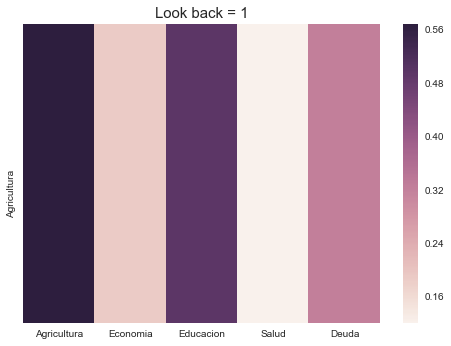

In [43]:
graficar_uno(df,1)

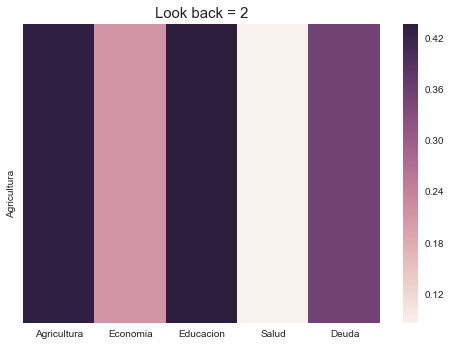

In [44]:
graficar_uno(df,2)

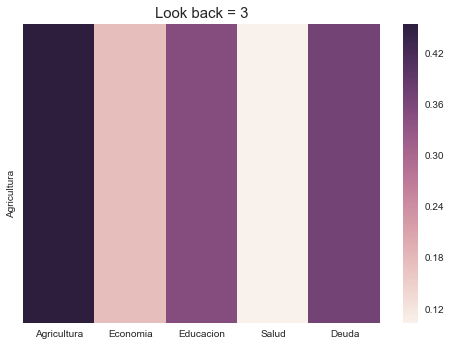

In [45]:
graficar_uno(df,3)

## Iteramos todas las Combinaciones Posibles de los Conjuntos de Indicadores datos

In [28]:
start_time = time.time()

resultado = []
for i in range(len(conjunto)):
    for j in range(len(conjunto)):
        for k in range(1,look_back+1):
            porcentaje,nombres = porcentaje_nombres(iterador_global_2(datos,paises,years,conjunto[i],conjunto[j],k),conjunto[j])
            resultado.append([conjunto_nombre[i],conjunto_nombre[j],k,porcentaje,nombres])

df_global = pd.DataFrame(resultado, columns=["Base","Target","Look Back","%","Indicators >90%"])
print("--- %s seconds ---" % (time.time() - start_time))
df_global

--- 34860.637985 seconds ---


,Base,Target,Look Back,%,Indicators >90%
0,Agricultura,Agricultura,1,0.613636,Indica...
1,Agricultura,Agricultura,2,0.500000,Indica...
2,Agricultura,Agricultura,3,0.386364,Indica...
3,Agricultura,Economia,1,0.464286,Indic...
4,Agricultura,Economia,2,0.396825,Indica...
5,Agricultura,Economia,3,0.376984,Indica...
6,Agricultura,Educacion,1,0.112069,Indica...
7,Agricultura,Educacion,2,0.086207,Indicat...
8,Agricultura,Educacion,3,0.094828,Indicat...
9,Agricultura,Salud,1,0.354331,Indica...


## Resultados globales:

In [29]:
pd.DataFrame.pivot_table(df_global, index=["Base","Target"], columns=["Look Back"] )

%                    
Look Back                       1         2         3
Base        Target                                   
Agricultura Agricultura  0.613636  0.500000  0.386364
            Deuda        0.200893  0.209821  0.196429
            Economia     0.464286  0.396825  0.376984
            Educacion    0.112069  0.086207  0.094828
            Salud        0.354331  0.307087  0.307087
Deuda       Agricultura  0.113636  0.159091  0.090909
            Deuda        0.245536  0.191964  0.236607
            Economia     0.325397  0.321429  0.277778
            Educacion    0.043103  0.034483  0.034483
            Salud        0.125984  0.086614  0.102362
Economia    Agricultura  0.250000  0.227273  0.227273
            Deuda        0.227679  0.147321  0.209821
            Economia     0.436508  0.428571  0.392857
            Educacion    0.086207  0.034483  0.051724
            Salud        0.259843  0.173228  0.188976
Educacion   Agricultura  0.204545  0.204545  0.204545
            Deuda        0.138393  0.165179  0.191964
            Economia     0.257937  0.230159  0.293651
            Educacion    0.267241  0.258621  0.258621
            Salud        0.196850  0.110236  0.102362
Salud       Agricultura  0.340909  0.477273  0.295455
            Deuda        0.254464  0.227679  0.236607
            Economia     0.480159  0.432540  0.345238
            Educacion    0.146552  0.112069  0.103448
            Salud        0.433071  0.409449  0.425197

In [30]:
buscar(df_global,'Economia','Economia',1).head()

,IndicatorName
0,Adjusted net national income (current US$)
1,Adjusted net national income per capita (annua...
2,Adjusted savings: carbon dioxide damage (% of ...
3,Adjusted savings: carbon dioxide damage (curre...
4,Adjusted savings: consumption of fixed capital...


In [31]:
buscar(df_global,'Economia','Economia',2).head()

,IndicatorName
0,Adjusted net national income (current US$)
1,Adjusted net national income per capita (annua...
2,"Adjusted net savings, including particulate em..."
3,Adjusted savings: carbon dioxide damage (% of ...
4,Adjusted savings: carbon dioxide damage (curre...


In [32]:
buscar(df_global,'Economia','Economia',3).head()

,IndicatorName
0,Adjusted net national income per capita (annua...
1,"Adjusted net savings, including particulate em..."
2,Adjusted savings: consumption of fixed capital...
3,Adjusted savings: education expenditure (% of ...
4,Adjusted savings: natural resources depletion ...


## Graficamos todas las iteraciones

In [33]:
def graficar(df,look_back):
    import seaborn as sns
    import matplotlib.pyplot as plt
    df_temp = df[df['Look Back'] == look_back].drop(['Indicators >90%','Look Back'], 1)
    df_temp = pd.DataFrame(np.array(pd.DataFrame.pivot_table(df_temp, index=["Base"], columns=["Target"])), index=[conjunto_nombre], columns=[conjunto_nombre])
    ax = sns.heatmap(df_temp)
    plt.title('Look back = '+str(look_back), size=15)
    return plt.show()

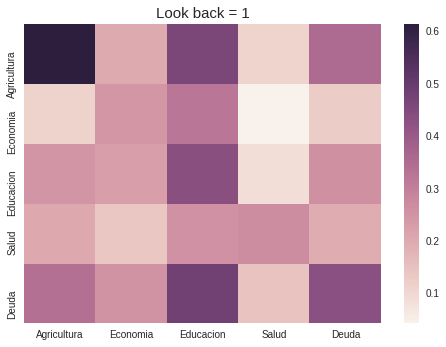

In [34]:
graficar(df_global,1)

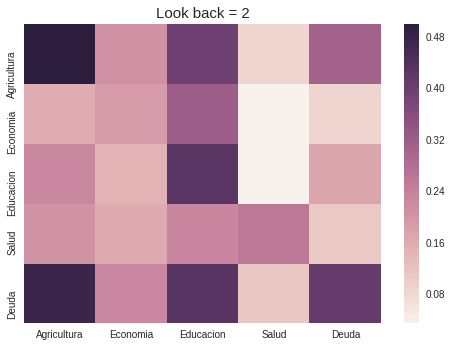

In [35]:
graficar(df_global,2)

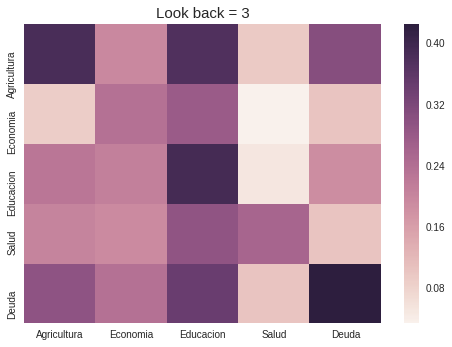

In [36]:
graficar(df_global,3)

In [37]:
df_global.to_csv('df_global_5.csv')